# Импорт библиотек и функции

In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import os
import shap
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Чтение данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/datasets/DS_2019_public.csv', encoding="cp1252", encoding_errors='replace')

Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
corr = df.corr()
th = 0.6

df = df.drop(corr["TOTALDOL"][abs(corr["TOTALDOL"]) <= th].keys(), axis=1)
df = df.drop(["DOLELCOL", "DOLFOSPH", "DOLELSPH", "DOLNGWTH", "CUFEETNGOTH", "KWHOTH", "CUFEETNGWTH", "CUFEETNGWTH", "DOLELRFG"], axis=1)
df.head()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,TOTALDOLSPH,DOLLAREL,DOLELOTH,TOTALDOLOTH,TOTALDOL,TOTALBTU,TOTALBTUOTH,TOTALDOLWTH,BTUELOTH,KWH,BTUEL,TOTALDOLRFG
0,368,475,337.315,501,1293,103460,29653,287,12473.544,5148,17565,121
1,582,588,296.353,339,1327,58716,6781,115,3814.291,2218,7568,243
2,425,952,512.731,534,1398,76401,20438,179,18403.933,10015,34171,159
3,616,705,619.862,620,1558,59809,8607,237,8606.856,2869,9789,85
4,685,1050,853.549,893,1906,114350,21968,131,17714.799,6387,21792,151


# Деление на выборки

In [ ]:
# делим выборку на тренировочную и тестовую
X = df.drop(['TOTALDOL'],axis=1).values # удаляем целевую переменную из общего набора данных
y = df['TOTALDOL'].values # создаем отделтнуб переменную для целевого признака
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) # делим набор данных на тренировочный и тестовый в соотношениии 80/20 (train/test)
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, test_size = 0.2, random_state = 0) # делим набор данных на тренировочный и валидационный в соотношениии 80/20 (train/test)

In [ ]:
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")

Размер тренировочной выборки: (7829, 11)
Размер тестовой выборки: (1088, 11)
Размер валидационной выборки: (1958, 11)


In [ ]:
# проводим стандартизацию данных, для лучшей работы нейронной сети
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Загрузка модели

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL/regression_model.h5')

# Shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
expected_value = explainer.expected_value

In [ ]:
print('Expected Value:', explainer.expected_value)

Expected Value: 2040.7274


## summary_plot

In [ ]:
feauter_names = ['TOTALDOLSPH', 'DOLLAREL', 'DOLELOTH', 'TOTALDOLOTH',
       'TOTALBTU', 'TOTALBTUOTH', 'TOTALDOLWTH', 'BTUELOTH', 'KWH', 'BTUEL',
       'TOTALDOLRFG']

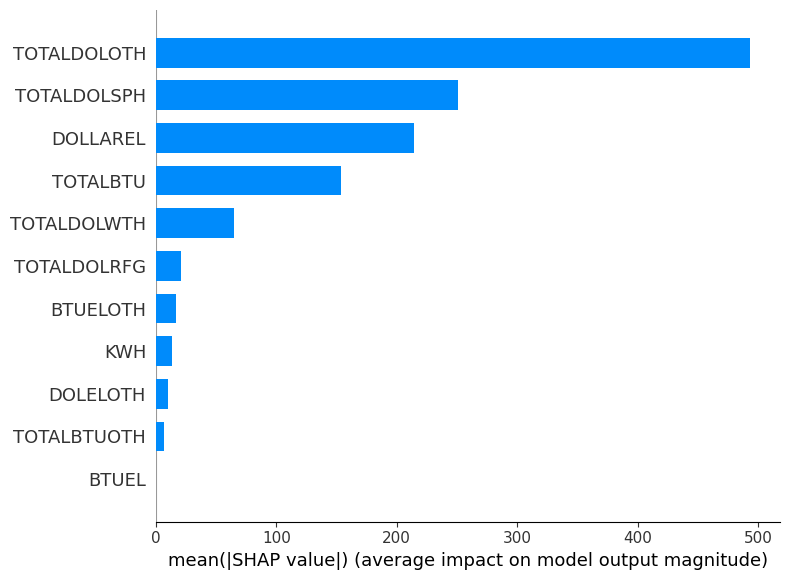

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feauter_names)

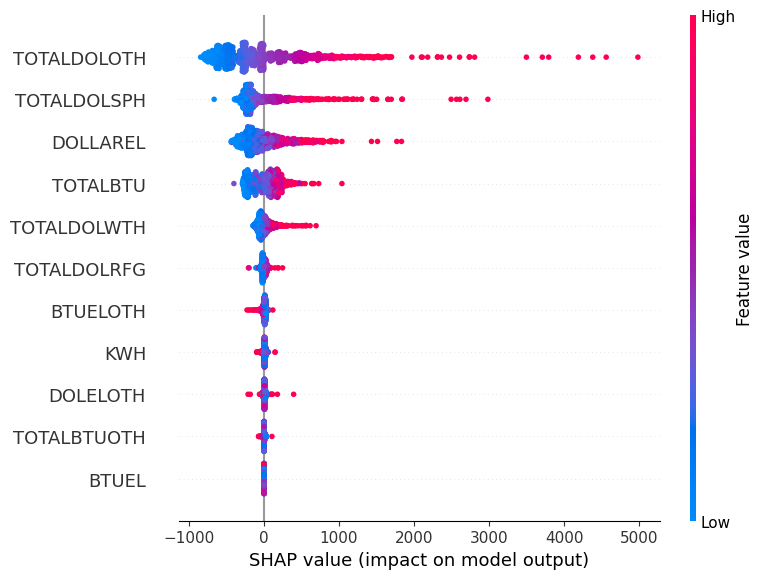

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=feauter_names)

## dependence_plot

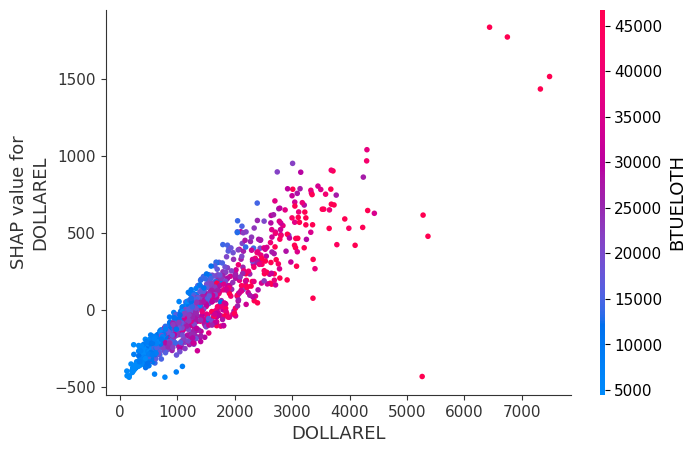

In [ ]:
shap.dependence_plot(ind='DOLLAREL', interaction_index='BTUELOTH',
                     shap_values=shap_values,
                     features=X_test,
                     feature_names=feauter_names)

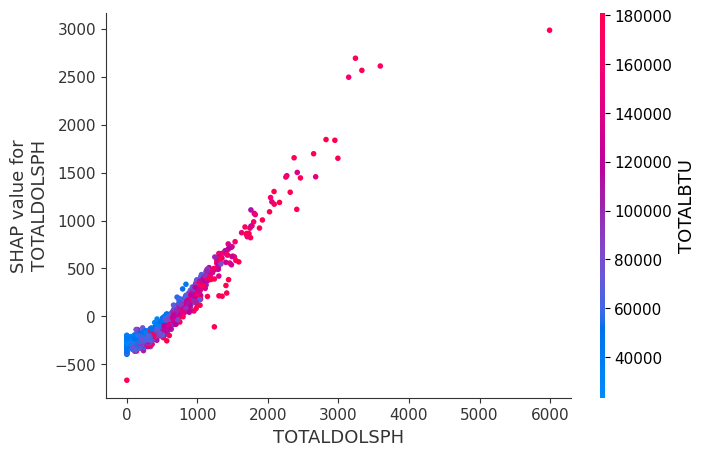

In [ ]:
shap.dependence_plot(ind='TOTALDOLSPH', interaction_index='TOTALBTU',
                     shap_values=shap_values,
                     features=X_test,
                     feature_names=feauter_names)

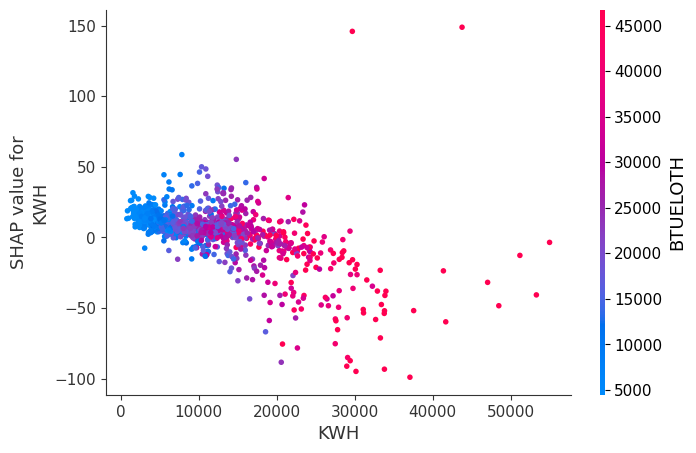

In [ ]:
shap.dependence_plot(ind='KWH', interaction_index='BTUELOTH',
                     shap_values=shap_values,
                     features=X_test,
                     feature_names=feauter_names)

## decision_plot

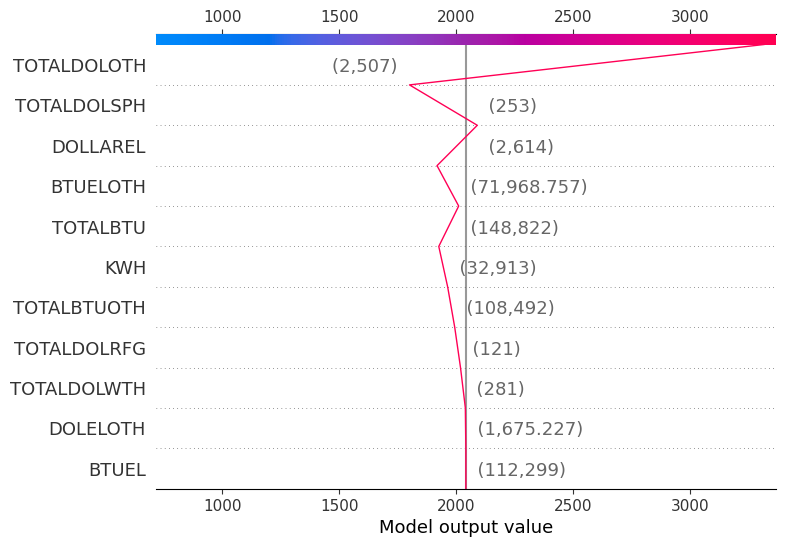

In [ ]:
shap.decision_plot(expected_value,
                shap_values[0,:], X_test[0],
                 feauter_names)

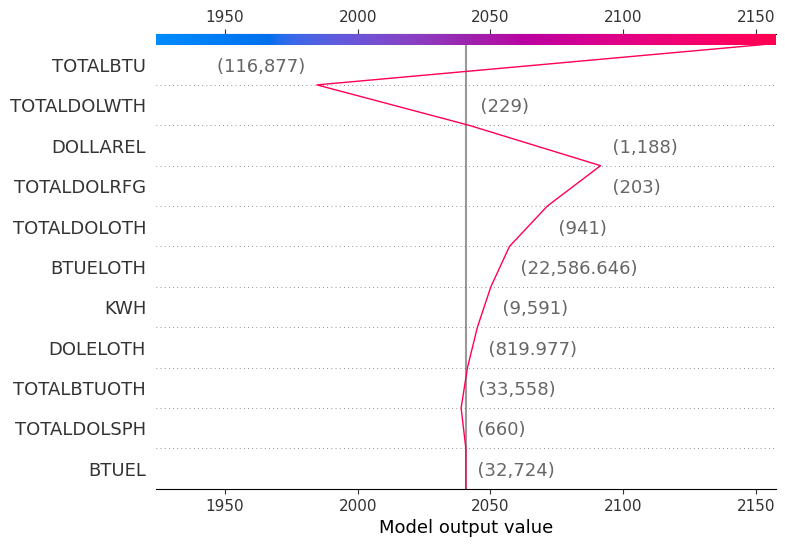

In [ ]:
shap.decision_plot(expected_value,
                shap_values[1,:], X_test[1],
                 feauter_names)

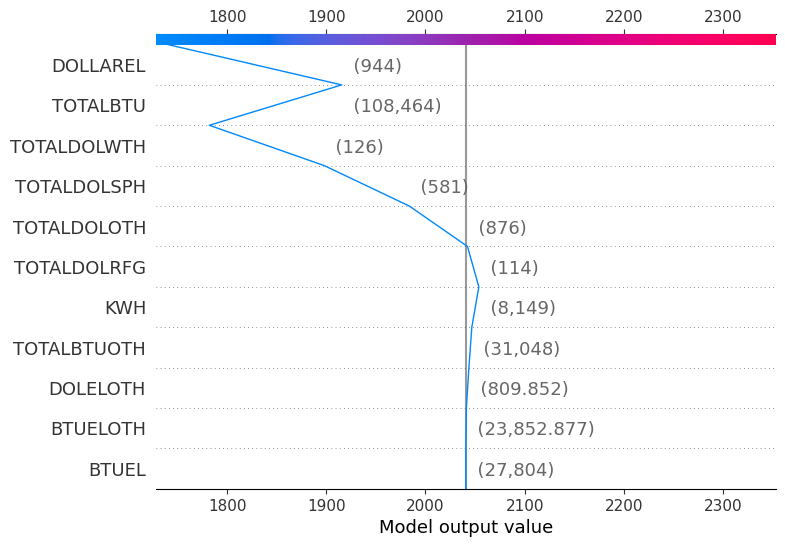

In [ ]:
shap.decision_plot(expected_value,
                shap_values[2,:], X_test[2],
                 feauter_names)

## force_plot

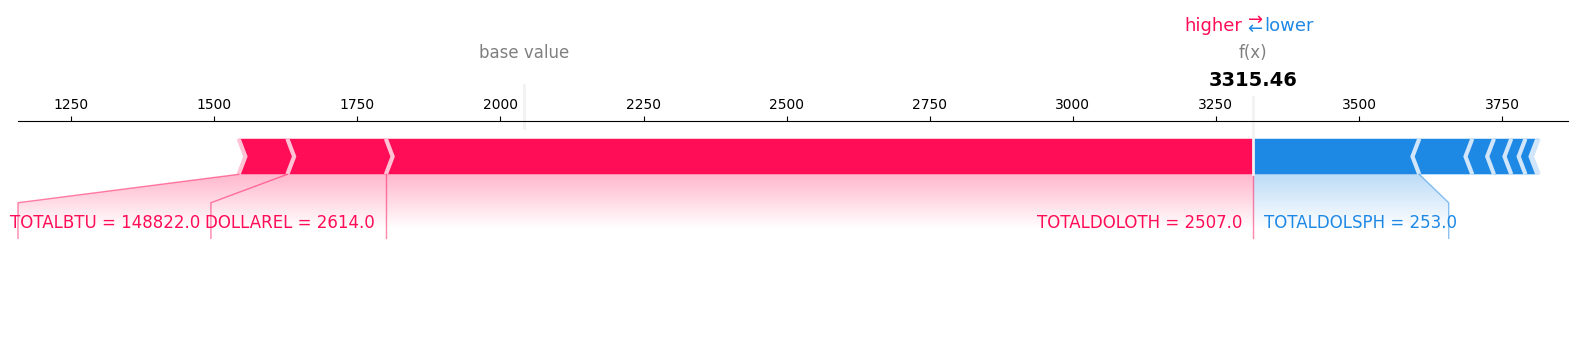

In [ ]:
shap.initjs()
shap.force_plot(expected_value,
                shap_values[0,:], X_test[0], feauter_names, matplotlib=True)

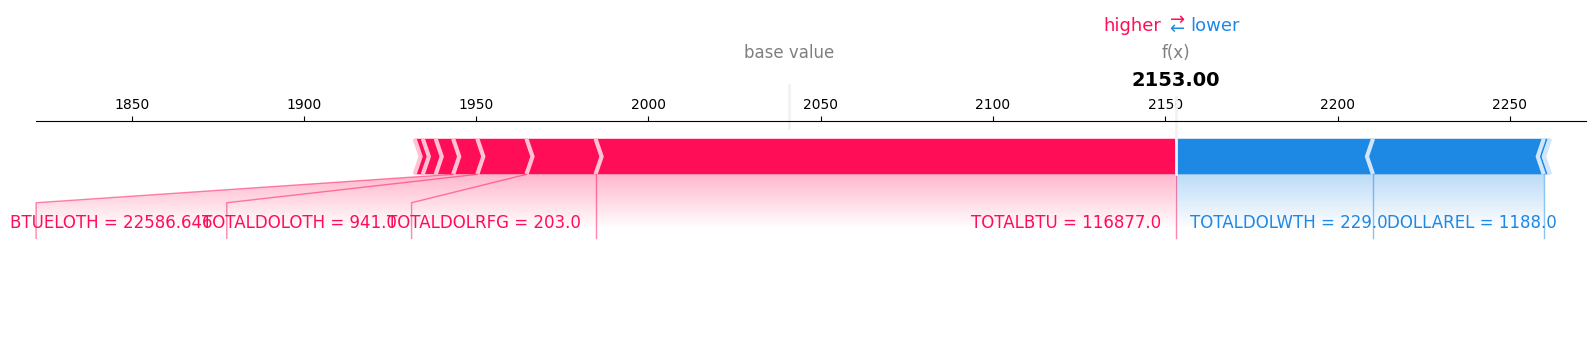

In [ ]:
shap.initjs()
shap.force_plot(expected_value,
                shap_values[1,:], X_test[1], feauter_names, matplotlib=True)

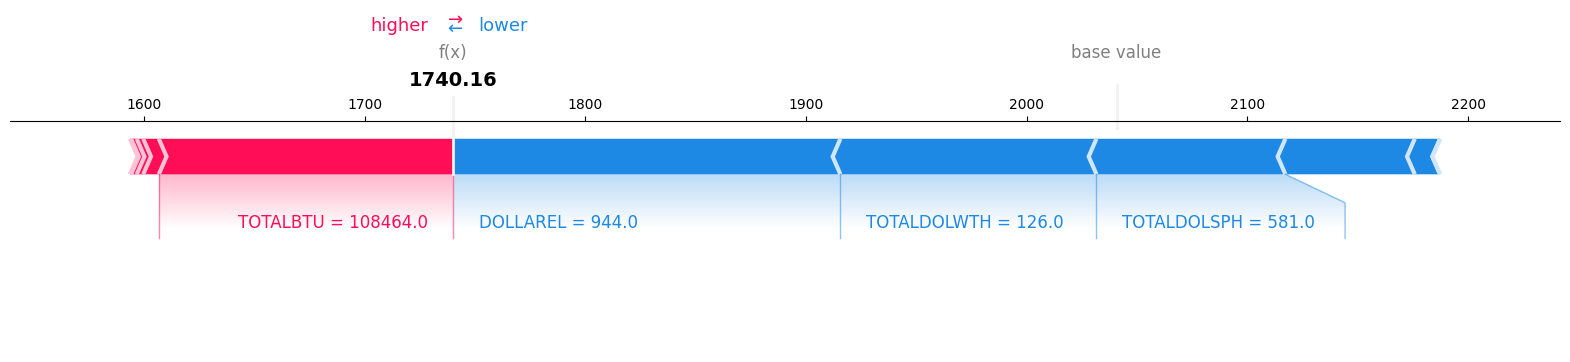

In [ ]:
shap.initjs()
shap.force_plot(expected_value,
                shap_values[2,:], X_test[2], feauter_names, matplotlib=True)

## waterfall_plot

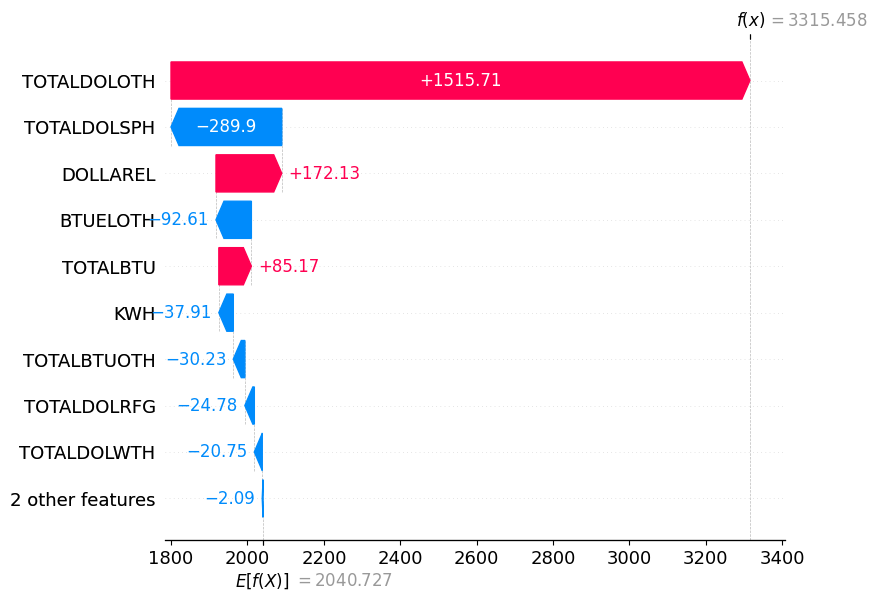

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[0],
                                       feature_names = feauter_names)

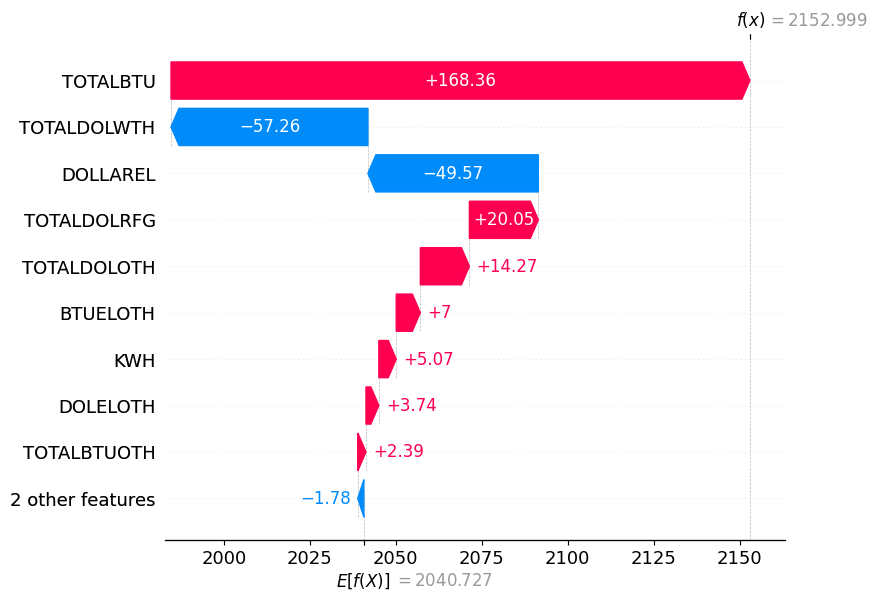

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[1],
                                       feature_names = feauter_names)

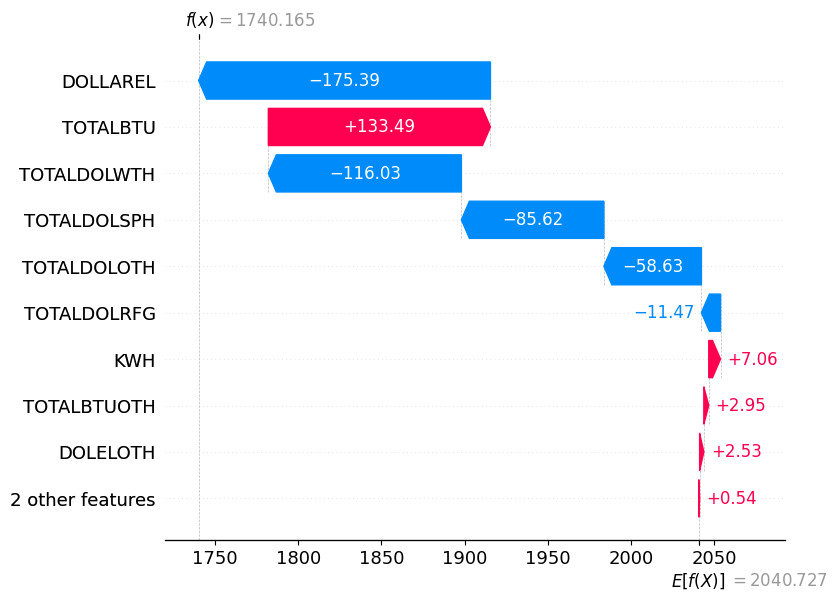

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[2],
                                       feature_names = feauter_names)

## partial_dependence

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

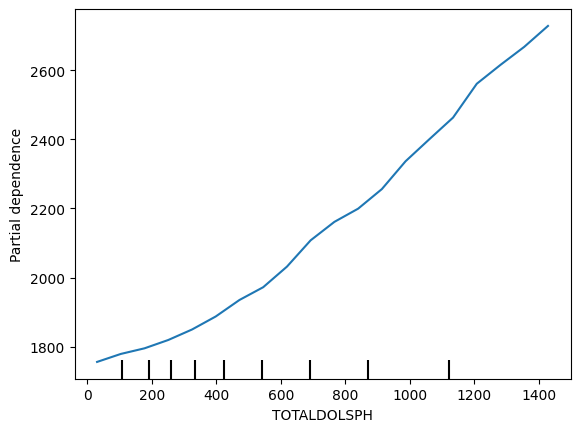

In [ ]:
PartialDependenceDisplay.from_estimator(model,
                                        X_test,
                                        n_jobs=-1,
                                        grid_resolution=20,
                                        features=['TOTALDOLSPH'],
                                        method='brute',
                                        feature_names=feauter_names)

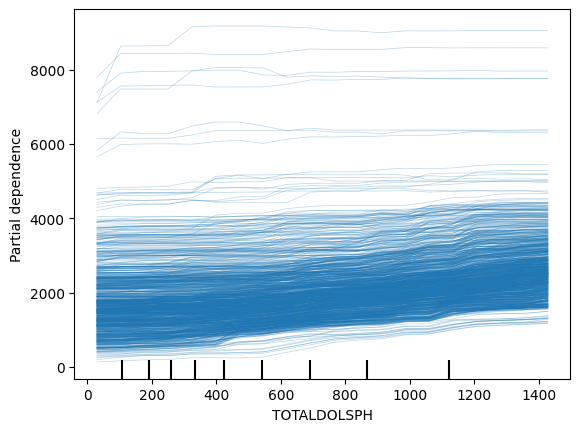

In [ ]:
PartialDependenceDisplay.from_estimator(model,
                                        X_test,
                                        n_jobs=-1,
                                        grid_resolution=20,
                                        features=['TOTALDOLSPH'],
                                        method='brute',
                                        feature_names=feauter_names,
                                        kind='individual')

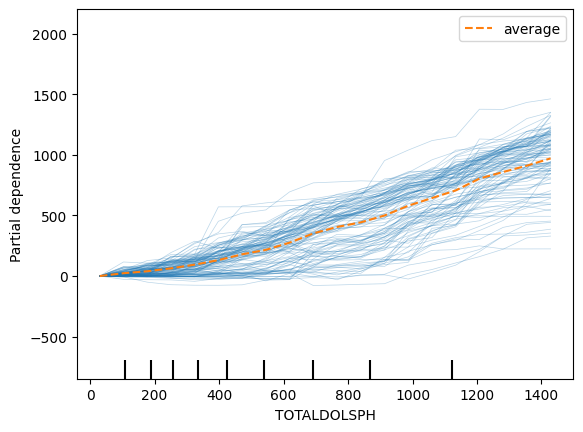

In [ ]:
PartialDependenceDisplay.from_estimator(model,
                                        X_test,
                                        centered=True,
                                        feature_names=feauter_names,
                                        n_jobs=-1,
                                        grid_resolution=20,
                                        subsample = 0.1,
                                        random_state = 0,
                                        features=['TOTALDOLSPH'],
                                        kind='both',
                                        method='brute')

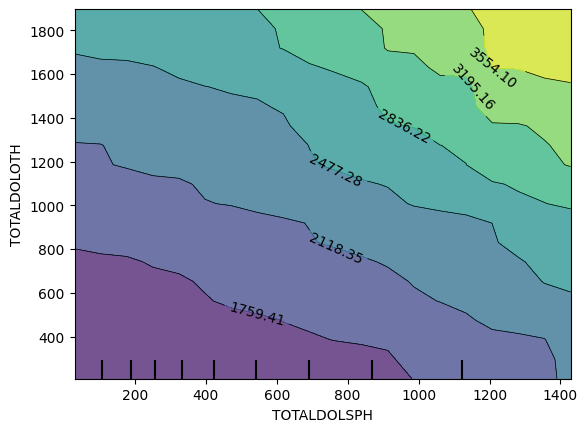

In [ ]:
PartialDependenceDisplay.from_estimator(model,
                                        X_test,
                                        n_jobs=-1,
                                        grid_resolution=20,
                                        features=[('TOTALDOLSPH', 'TOTALDOLOTH')],
                                        method='brute',
                                        feature_names=feauter_names)